In [2]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
results_path = os.path.join('../results/', 'task3')
file_path = os.path.join(results_path, 'num_background_sweep.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)

In [51]:

num_backgrounds = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
shap_vals_relu = np.mean(results['relu']['deepshap'], axis=2)
shap_vals_exp = np.mean(results['exponential']['deepshap'], axis=2)
ig_vals_relu = np.mean(results['relu']['integratedgrad'], axis=2)
ig_vals_exp = np.mean(results['exponential']['integratedgrad'], axis=2)

shap_vals_relu_std = np.std(results['relu']['deepshap'], axis=2)
shap_vals_exp_std = np.std(results['exponential']['deepshap'], axis=2)
ig_vals_relu_std = np.std(results['relu']['integratedgrad'], axis=2)
ig_vals_exp_std = np.std(results['exponential']['integratedgrad'], axis=2)


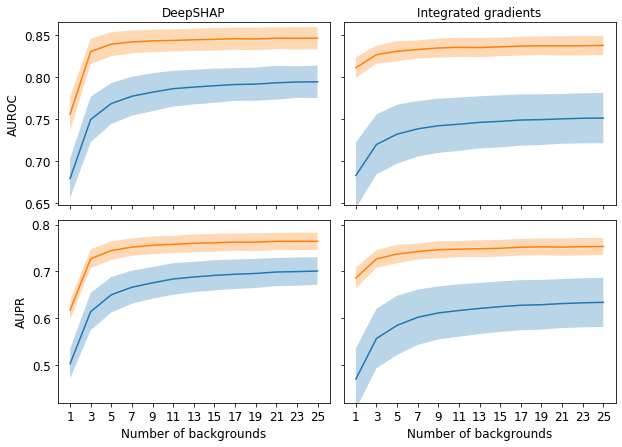

In [109]:
fig = plt.figure(figsize=(10,7))
ax= plt.subplot(2,2,1)
x = num_backgrounds
y = shap_vals_relu[:,0]
ax.plot(x, y)
error = shap_vals_relu_std[:,0]
ax.fill_between(x, y-error, y+error, alpha=0.3)
#plt.plot(num_backgrounds, shap_vals_exp[:,0])
y = shap_vals_exp[:,0]
ax.plot(x, y)
error = shap_vals_exp_std[:,0]
ax.fill_between(x, y-error, y+error, alpha=0.3)
#plt.xlabel('Number of backgrounds', fontsize=12)
plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.65, 0.7, 0.75, 0.8, .85], fontsize=12)
plt.xticks(num_backgrounds, fontsize=12);
ax.tick_params(labelbottom=False) 
ax.set_ybound([.647,0.865])
plt.title('DeepSHAP', fontsize=12)

ax = plt.subplot(2,2,3)
y = shap_vals_relu[:,1]
plt.plot(x, y)
error = shap_vals_relu_std[:,1]
plt.fill_between(x, y-error, y+error, alpha=0.3)
#plt.plot(num_backgrounds, shap_vals_exp[:,0])
y = shap_vals_exp[:,1]
plt.plot(x, y)
error = shap_vals_exp_std[:,1]
plt.fill_between(x, y-error, y+error, alpha=0.3)
plt.xlabel('Number of backgrounds', fontsize=12)
plt.ylabel('AUPR', fontsize=12)
plt.yticks([ 0.5, 0.6, 0.7, 0.8], fontsize=12)
plt.xticks(num_backgrounds, fontsize=12);
ax.set_ybound([.42,0.81])


ax = plt.subplot(2,2,2)
x = num_backgrounds
y = ig_vals_relu[:,0]
ax.plot(x, y)
error = ig_vals_relu_std[:,0]
ax.fill_between(x, y-error, y+error, alpha=0.3)
#plt.plot(num_backgrounds, shap_vals_exp[:,0])
y = ig_vals_exp[:,0]
ax.plot(x, y)
error = ig_vals_exp_std[:,0]
ax.fill_between(x, y-error, y+error, alpha=0.3)
#plt.xlabel('Number of backgrounds', fontsize=12)
#plt.ylabel('AUROC', fontsize=12)
plt.yticks([0.65, 0.7, 0.75, 0.8, .85], fontsize=12)
plt.xticks(num_backgrounds, fontsize=12);
ax.tick_params(labelbottom=False) 
ax.tick_params(labelleft=False) 
ax.set_ybound([.647,0.865])
plt.title('Integrated gradients', fontsize=12)

ax = plt.subplot(2,2,4)
y = ig_vals_relu[:,1]
plt.plot(x, y)
error = ig_vals_relu_std[:,1]
plt.fill_between(x, y-error, y+error, alpha=0.3)
#plt.plot(num_backgrounds, shap_vals_exp[:,0])
y = ig_vals_exp[:,1]
plt.plot(x, y)
error = ig_vals_exp_std[:,1]
plt.fill_between(x, y-error, y+error, alpha=0.3)
plt.xlabel('Number of backgrounds', fontsize=12)
#plt.ylabel('AUPR', fontsize=12)
ax.tick_params(labelleft=False) 
plt.yticks([ 0.5, 0.6, 0.7, 0.8], fontsize=12)
ax.set_ybound([.42,0.81])
plt.xticks(num_backgrounds, fontsize=12);

plt.subplots_adjust(wspace=0.05, hspace=0.08)

outfile = os.path.join(results_path, 'task3_num_background_sweep')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')